In [2]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [3]:
def imshow(title = 'Image', image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

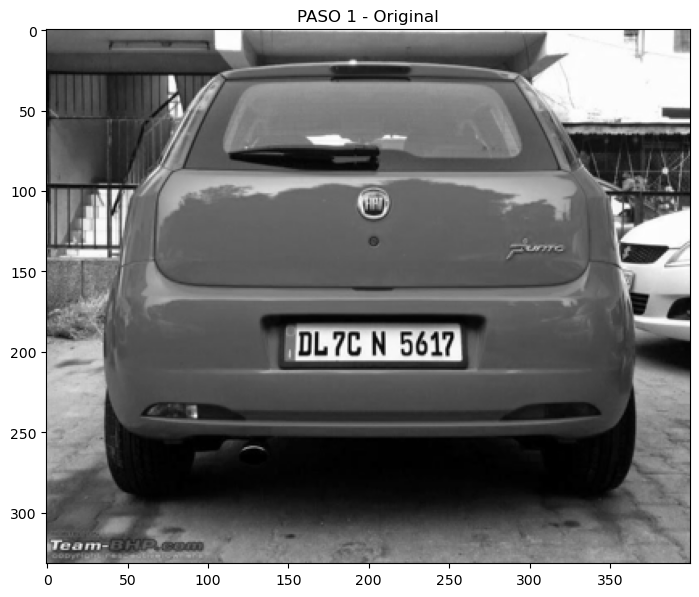

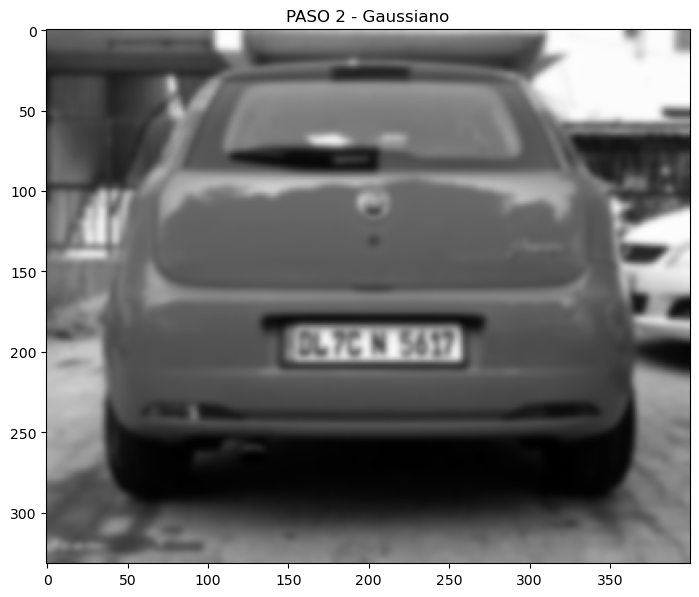

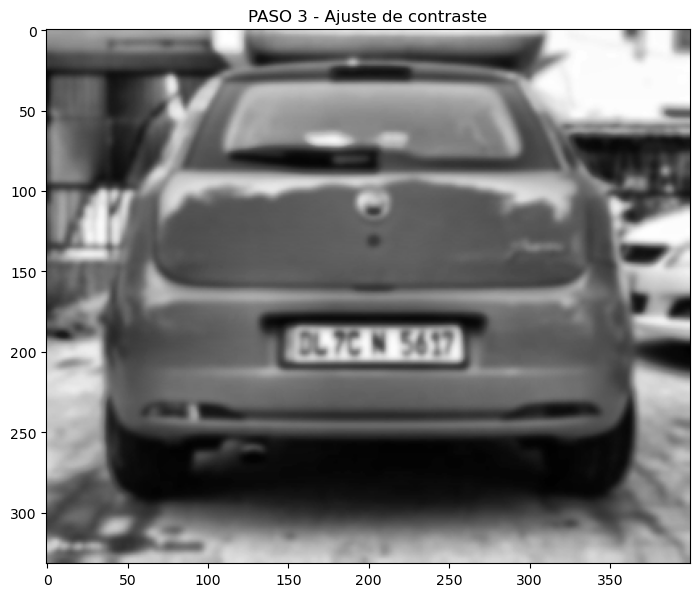

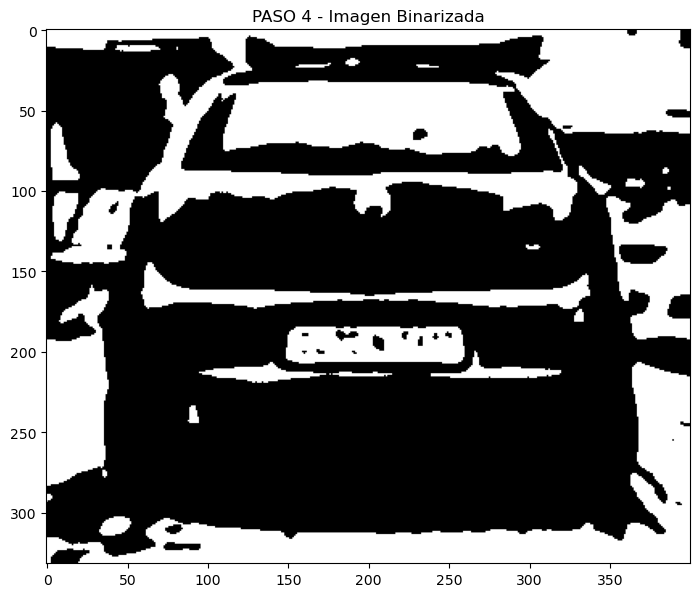

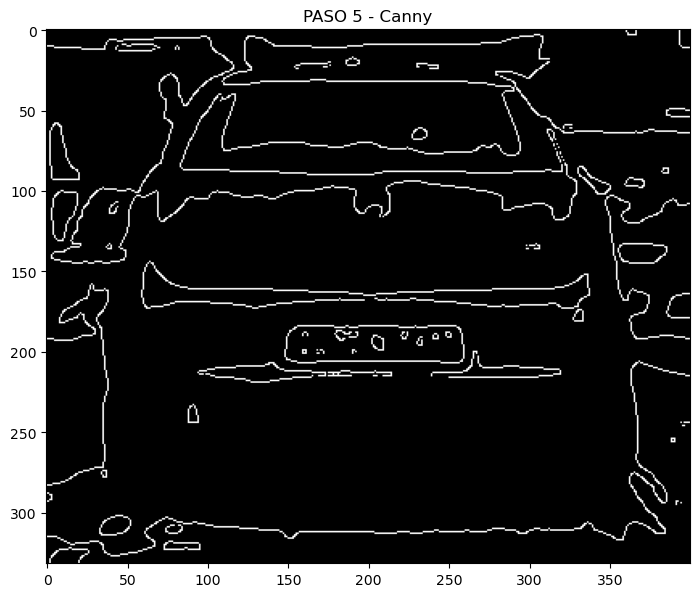

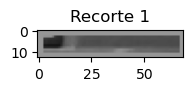

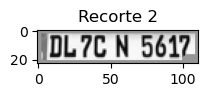

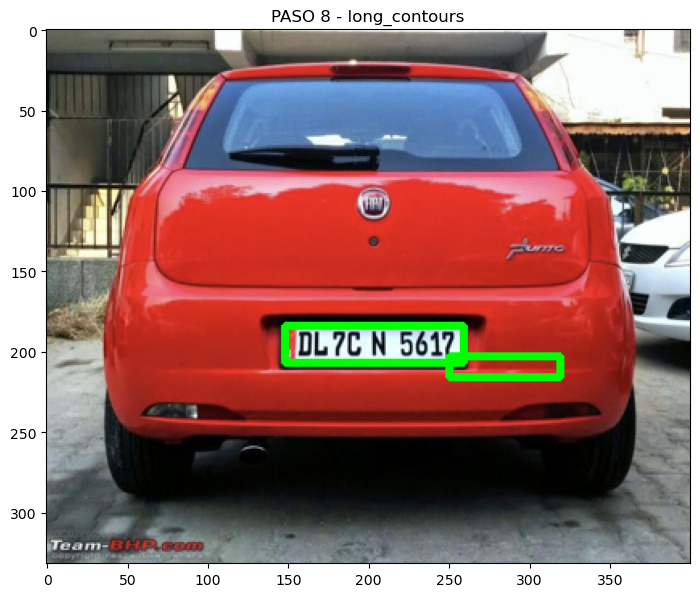

In [10]:


# Paso 1. Leer imagen a color y transformar a escala de grises
img_color = cv.imread("Cars34.png")
img_gris = cv.imread("Cars34.png", cv.IMREAD_GRAYSCALE)

imshow("PASO 1 - Original", img_gris)

# Paso 2. Suavisar la imagen (Filtro gausiano con kernel de 11x11)
blur = cv.GaussianBlur(img_gris,(11,11), 0)
# blur = img_gris
imshow("PASO 2 - Gaussiano", blur)

# Paso 3. Mejora de contraste (Ajuste local de contraste adaptativo)
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
equ01 = clahe.apply(blur)
imshow("PASO 3 - Ajuste de contraste", equ01)

# Paso 4. Binarizar la imagen (Otsu)
otsu_threshold, otsu01 = cv.threshold(equ01, 0, 255, cv.THRESH_OTSU)
imshow("PASO 4 - Imagen Binarizada", otsu01)

# Paso 5. Obtener border (CANNY)
edges = cv.Canny(otsu01, 150, 350)
imshow("PASO 5 - Canny", edges)

# Paso 6. Guardar bordes
contours, hierachy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
long_contours = [cnt for cnt in contours if(cv.arcLength(cnt, True) > 200
                                            and (cv.arcLength(cnt, True) < 700))]

# Paso 7. Dibujar placas candidatas
alto, ancho, canales = img_color.shape

for i, lonc in enumerate(long_contours):
    r = [x for [[x, y]] in lonc]
    s = [y for [[x, y]] in lonc]
    prop = (max(s) - min(s)) - (max(r) - min(r))   
    
    if ((max(s)> round(alto/2)) and (prop<0)):

        #
        cv.rectangle(img_color,(min(r),min(s)),(max(r),max(s)),(0,255,0),3)  

        # Crear recorte
        recorte = img_color[min(s):max(s), min(r):max(r)]
        
        gray = cv.cvtColor(recorte, cv.COLOR_BGR2GRAY)
        imshow(f"Recorte {i + 1}", gray)

        try:
            #
            # Inicializar el objeto OCR
            # ocr = cv.text.OCRTesseract_create()
            print("")

            # Realizar OCR en la imagen
            # result, text = ocr.run(gray, 0, cv.text.OCR_LEVEL_WORD)
            # result, text = ocr.run(gray, 0)

            # print("Texto detectado:", text)
        except Exception as e:
            print("ERROR:", e)

        # Aplicar OCR utilizando Tesseract
        # text = pytesseract.image_to_string(gray_region, lang='eng')

        # Imprimir el texto encontrado
        # print("Texto encontrado:", text)
        
imshow("PASO 8 - long_contours", img_color)

